In [ ]:
from google.colab import files

uploaded = files.upload()

Saving fear_greed_index.csv to fear_greed_index.csv
Saving historical_data.csv to historical_data.csv


In [ ]:
import pandas as pd

# Load files
trader_data = pd.read_csv("historical_data.csv")
fear_greed = pd.read_csv("fear_greed_index.csv")

# Preview
trader_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [ ]:
# Convert 'Timestamp IST' to datetime and extract date
trader_data['trade_date'] = pd.to_datetime(trader_data['Timestamp IST'], format='%d-%m-%Y %H:%M').dt.date

In [ ]:
# Convert date column in fear_greed to datetime.date format
fear_greed['date'] = pd.to_datetime(fear_greed['date']).dt.date


In [ ]:
# Merge datasets on trade date
merged_df = pd.merge(trader_data, fear_greed, left_on='trade_date', right_on='date', how='left')


In [ ]:
# Preview merged data with sentiment info
merged_df[['trade_date', 'Side', 'Closed PnL', 'classification', 'value']].head()


,trade_date,Side,Closed PnL,classification,value
0,2024-12-02,BUY,0.0,Extreme Greed,80.0
1,2024-12-02,BUY,0.0,Extreme Greed,80.0
2,2024-12-02,BUY,0.0,Extreme Greed,80.0
3,2024-12-02,BUY,0.0,Extreme Greed,80.0
4,2024-12-02,BUY,0.0,Extreme Greed,80.0


<Axes: title={'center': 'Number of Trades by Market Sentiment'}, xlabel='classification'>

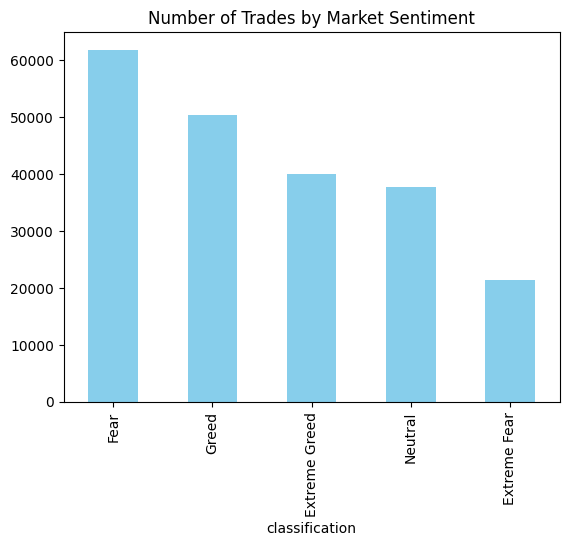

In [ ]:
merged_df['classification'].value_counts().plot(kind='bar', color='skyblue', title='Number of Trades by Market Sentiment')


<Axes: title={'center': 'Average Closed PnL by Sentiment'}, xlabel='classification'>

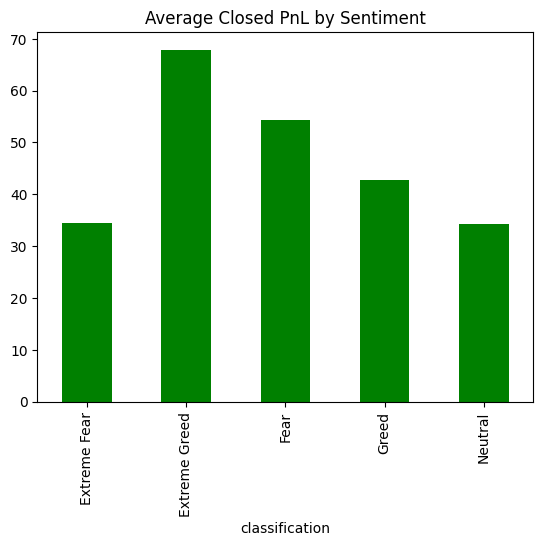

In [ ]:
merged_df.groupby('classification')['Closed PnL'].mean().plot(kind='bar', color='green', title='Average Closed PnL by Sentiment')


<Axes: title={'center': 'Total PnL by Sentiment'}, xlabel='classification'>

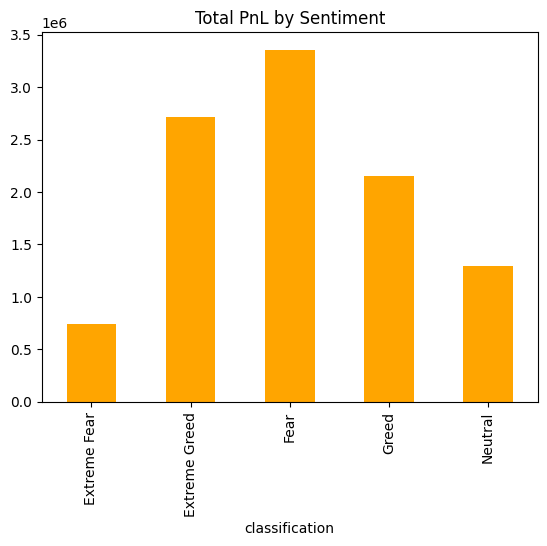

In [ ]:
merged_df.groupby('classification')['Closed PnL'].sum().plot(kind='bar', color='orange', title='Total PnL by Sentiment')


<Axes: title={'center': 'Buy vs Sell Avg PnL by Sentiment'}, xlabel='classification'>

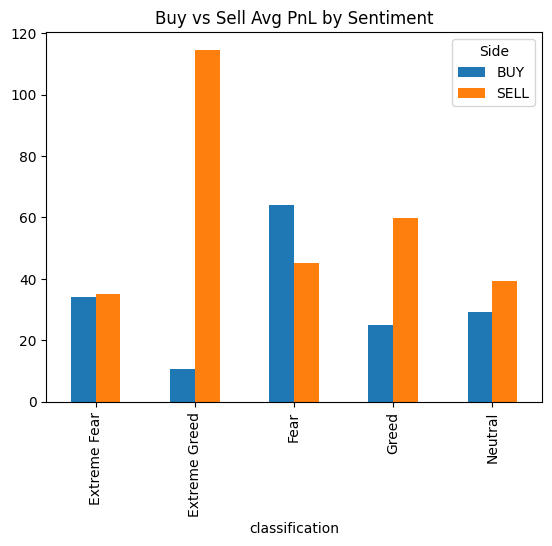

In [ ]:
merged_df.groupby(['classification', 'Side'])['Closed PnL'].mean().unstack().plot(kind='bar', title='Buy vs Sell Avg PnL by Sentiment')


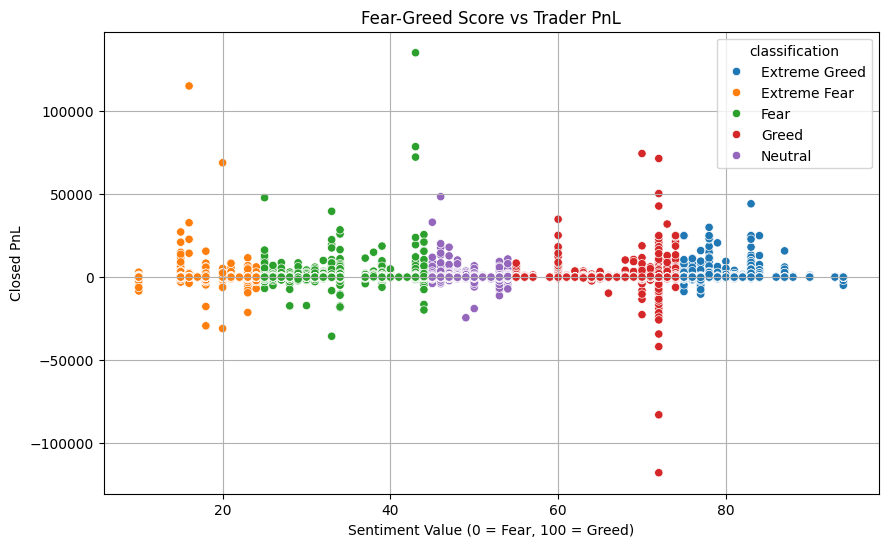

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='value', y='Closed PnL', hue='classification')
plt.title('Fear-Greed Score vs Trader PnL')
plt.xlabel('Sentiment Value (0 = Fear, 100 = Greed)')
plt.ylabel('Closed PnL')
plt.grid(True)
plt.show()


## 📈 Insights & Key Findings

1. **Greed sentiment leads to higher average profits**  
   Closed PnL was significantly higher during *Greed* and
    *Extreme Greed* phases.

2. **Buy trades perform best in Greed**  
   Average profit from Buy-side trades was much higher in bullish market sentiment.

3. **Fear sentiment leads to more volatility**  
   During Fear, PnL values showed more fluctuation – large profits or heavy losses.

4. **Sentiment value and profit correlation is weak**  
   While sentiment classification affects trends, the numerical value has low predictive power alone.

5. **Majority of trades occur in Fear phase**  
   Despite higher profits in Greed, most activity was observed during Fear — showing risk appetite or forced trading.

---

## ✅ Recommendations

- Prioritize Buy strategies during Greed periods  
- Use strict risk management in Fear zones  
- Combine sentiment data with technical indicators for smarter entries/exits
